# Ariline Customer Satisfaction Clustering (Lab #3: DS7331)

SMU Student collaboration:
1. Renfeng Wang
2. Alexander Sepenu
3. Zachary Zaiken
4. Venkata 'MG' Vanga
---------------------------------------------

## 1.0 Business Understanding

The data used in this analysis is from the "Airline Passenger Satisfaction" dataset sourced from Kaggle. 

https://www.kaggle.com/binaryjoker/airline-passenger-satisfaction.  
        
This dataset comes from a survey that measured Airline passenger satisfaction and to understand the various factors that contribute to airline passenger perceived level of satisfaction. The survey was conducted to gather data so the airline companies could improve on Quality of Service (QoS) that will meet the expectations of passengers and help these companies stay competitive within the industry. The model when built will help these companies' direct resources that will target specific attributes to improve on services hence saving them millions of dollars that would otherwise gone to a gamut of service improvement campaigns. The dataset can be leveraged into a supervised machine learning classification model that can predict customer satisfaction for this dataset set as well as predict future flights experiences based on attributes and datapoints used.

In this Lab 3 we mainly focus on clustering different attributes of the dataset. The reasons we chose this dataset are 1. The some attributes have similarities, which can likely be clustered. 2. Most of the attributes are discrete variables containing different levels. Though it is unclear exactly where to split discrete variables and how many levels we should make at this point, the purpose of our lab 3 is to try a few different parameterizations to investigate this (numbers of cluster and the algorithm for clustering).

The algorithms will be used are Kmeans, Agglomerative Clustering and DBSCAN. The metrics will be used are average accuracy and we will include silhouette analysis and elbow method as exceptional Work

## 2.0 Data Understanding 1

In [120]:
import pandas as pd
import numpy as np
# read in the csv file
airline_df = pd.read_csv('https://raw.githubusercontent.com/wangrenfeng0/Machine-Learning-I/main/airline_passenger_satisfaction.csv') 

#### Below table shows all the data types, attributes' descriptions and scale of values for the dataset. 

- Continuous Variables are highlighted in light gray
- Ordinal variables highlighted in light blue and 
- Categorical variables are shown in white color.

![DataDesc-2.jpg](attachment:DataDesc-2.jpg)

In [121]:
airline_df.head()

,Unnamed: 0,Gender,customer_type,age,type_of_travel,customer_class,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,...,inflight_entertainment,onboard_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction
0,0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


We can observe from the above table that there are 24 attributes in the dataset. 'Unnamed:0' being the ID of the each row. We delete this attribute and continue with Exploratory Data Analysis (EDA) for the remaining 23 attributes.

In [122]:
if 'Unnamed: 0' in airline_df:
    del airline_df['Unnamed: 0']

airline_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             129880 non-null  object 
 1   customer_type                      129880 non-null  object 
 2   age                                129880 non-null  int64  
 3   type_of_travel                     129880 non-null  object 
 4   customer_class                     129880 non-null  object 
 5   flight_distance                    129880 non-null  int64  
 6   inflight_wifi_service              129880 non-null  int64  
 7   departure_arrival_time_convenient  129880 non-null  int64  
 8   ease_of_online_booking             129880 non-null  int64  
 9   gate_location                      129880 non-null  int64  
 10  food_and_drink                     129880 non-null  int64  
 11  online_boarding                    1298

### Missing data

It can be observed from Data meaning type that there are total 129,880 records of data in each of 23 variables except for variable:'arrival_delay_in_minutes' which only has 129,487 records (393 missing).

The 393 missing values constitute about 0.3% of the total 'arrival_delay_in_minutes' count, since this is a such small count and may not have significant influence on final results, we are going to delete these rows and continue with our EDA.

In [123]:
airline_df = airline_df.dropna()
airline_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129487 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             129487 non-null  object 
 1   customer_type                      129487 non-null  object 
 2   age                                129487 non-null  int64  
 3   type_of_travel                     129487 non-null  object 
 4   customer_class                     129487 non-null  object 
 5   flight_distance                    129487 non-null  int64  
 6   inflight_wifi_service              129487 non-null  int64  
 7   departure_arrival_time_convenient  129487 non-null  int64  
 8   ease_of_online_booking             129487 non-null  int64  
 9   gate_location                      129487 non-null  int64  
 10  food_and_drink                     129487 non-null  int64  
 11  online_boarding                    1294

Entire dataset now only has 129,487 records for the EDA.

------


### Outlier detection/discussion:

#### Box plots for continuous variables:

<AxesSubplot:title={'center':'arrival_delay_in_minutes'}, xlabel='satisfaction'>

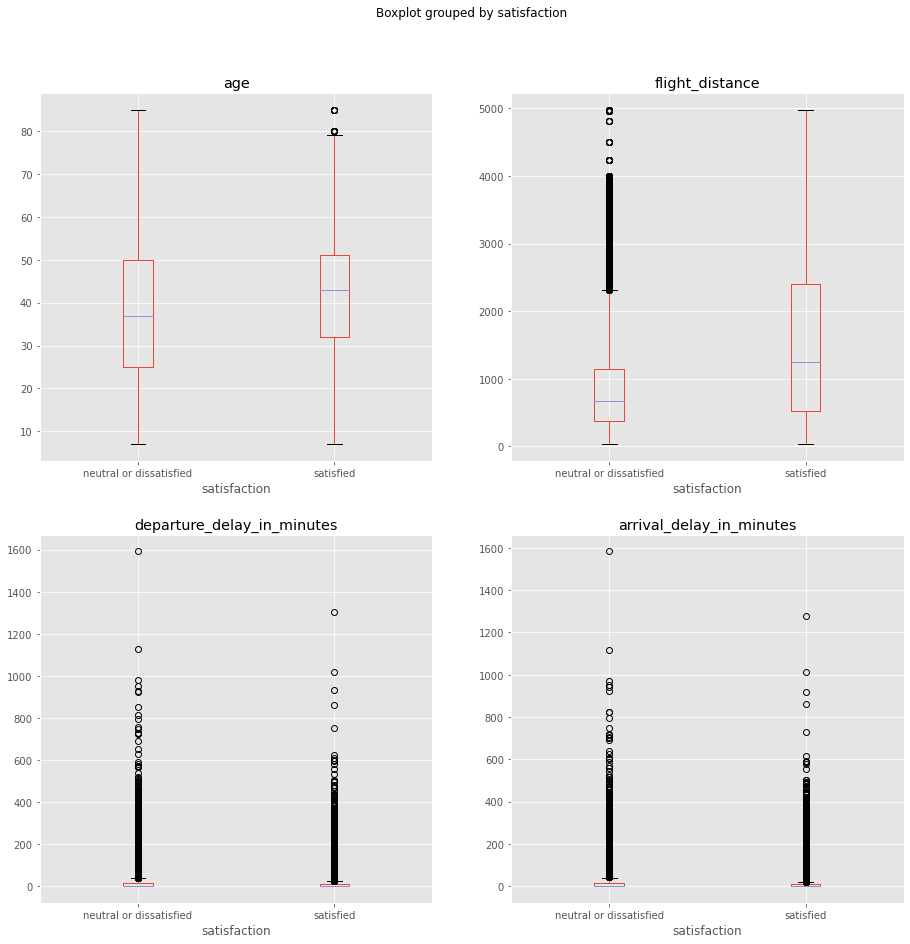

In [124]:
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore', DeprecationWarning)
%matplotlib inline

fig, axs = plt.subplots(nrows=2, ncols=2,figsize = (15,15))
airline_df.boxplot(column='age', by='satisfaction', ax=axs[0,0])
airline_df.boxplot(column='flight_distance', by='satisfaction',ax=axs[0,1])
airline_df.boxplot(column='departure_delay_in_minutes', by='satisfaction',ax=axs[1,0])
airline_df.boxplot(column='arrival_delay_in_minutes', by='satisfaction',ax=axs[1,1])

We have checked for outliers in the dataset by boxplots. The only variables are subjected to this analysis are four continuous variables (departure_delay_in_minutes, arrival_delay_in_minutes, flight distance and age). There appeared to be some outliers, but not until we fit some models, can we calculate Cook's D or leverage to idenitify and deal with them.  

For arrival and departure delay, the most common value is 0 min (i.e. no delay), as such any significant delay will be viewed as an outlier.  The team's approach here will be to cut and transform the 4 continuous variables into categorical variables.  For example age will be cut into child, adult and senior.  This removes the outliers and creates another variable to be used for classification prediction. Please see section 7 New Features for details.

Additional discussion for the outlier detection is shown below:

#### Using the 68–95–99 rule to detect Outliers 

Outliers:

Using the 68-95-99 rule, we can detect outliers in the various attribute. To explain this rule 68% of the data is within one standard deviation above or below the mean, and 95% of the data is within two standard deviations from the mean, also 99.7% of the data is within three standard deviations from the mean. With this rule of thumb only very few data points should be beyond three standard deviations from the mean, more precisely, only 0.3% of the data points. Therefore, any data point that is seen farther than three standard deviations is considered extreme and an outlier.

To check if a data point is an outlier and check if it falls farther than three standard deviations, we calculate:

Q1 – (1.5 * IQR)

Q3 + (1.5 * IQR)

These represent the lower and upper bounds of the area in the distribution that is not considered extreme. Which ends up being approximately 3 standard deviations from the mean. Hence, any data point lower than the lower bound or greater than the upper bound is an outlier and they are greater than the 3 standard deviations. 

Implying;
(ant data point value) < Q1– (1.5 * IQR), then it’s an outlier

(any data point value) > Q3 + (1.5 * IQR), then it’s an outlier

27.0
40.0
51.0
24.0
-9.0 87.0


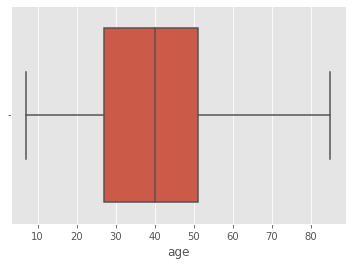

In [125]:
## checking for outliers in four of the continious predictors
### varying the predictors to visualize the outliers within the datasets

import seaborn as sns
sns.boxplot(data=airline_df,x=airline_df['age'])

Q1 = airline_df['age'].quantile(0.25)

Q2 = airline_df['age'].quantile(0.50)

Q3 = airline_df['age'].quantile(0.75)

IQR=Q3-Q1

print(Q1)  # First quartile

print(Q2)  # Second quartile

print(Q3)   # Third quartile

print(IQR)  # Inter quartile range Q3 - Q1


Lower_Whisker = Q1 - 1.5 * IQR 

Upper_Whisker = Q3 + 1.5 * IQR

print(Lower_Whisker, Upper_Whisker)

414.0
844.0
1744.0
1330.0
-1581.0 3739.0


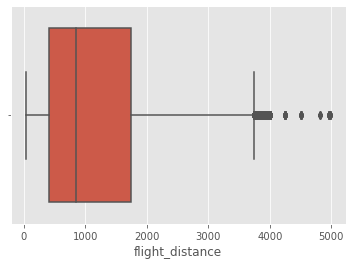

In [126]:
## checking for outliers in four of the continious predictors
### varying the predictors to visualize the outliers within the datasets

import seaborn as sns
sns.boxplot(data=airline_df,x=airline_df['flight_distance'])

Q1 = airline_df['flight_distance'].quantile(0.25)

Q2 = airline_df['flight_distance'].quantile(0.50)

Q3 = airline_df['flight_distance'].quantile(0.75)

IQR=Q3-Q1

print(Q1)  # First quartile

print(Q2)  # Second quartile

print(Q3)   # Third quartile

print(IQR)  # Inter quartile range Q3 - Q1


Lower_Whisker = Q1 - 1.5 * IQR 

Upper_Whisker = Q3 + 1.5 * IQR

print(Lower_Whisker, Upper_Whisker)

0.0
0.0
12.0
12.0
-18.0 30.0


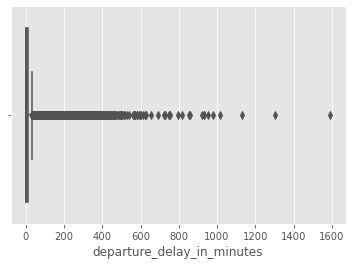

In [127]:
## checking for outliers in four of the continious predictors
### varying the predictors to visualize the outliers within the datasets

import seaborn as sns
sns.boxplot(data=airline_df,x=airline_df['departure_delay_in_minutes'])

Q1 = airline_df['departure_delay_in_minutes'].quantile(0.25)

Q2 = airline_df['departure_delay_in_minutes'].quantile(0.50)

Q3 = airline_df['departure_delay_in_minutes'].quantile(0.75)

IQR=Q3-Q1

print(Q1)  # First quartile

print(Q2)  # Second quartile

print(Q3)   # Third quartile

print(IQR)  # Inter quartile range Q3 - Q1


Lower_Whisker = Q1 - 1.5 * IQR 

Upper_Whisker = Q3 + 1.5 * IQR

print(Lower_Whisker, Upper_Whisker)

0.0
0.0
13.0
13.0
-19.5 32.5


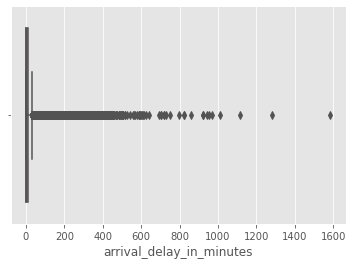

In [128]:
## checking for outliers in four of the continious predictors
### varying the predictors to visualize the outliers within the datasets

import seaborn as sns
sns.boxplot(data=airline_df,x=airline_df['arrival_delay_in_minutes'])

Q1 = airline_df['arrival_delay_in_minutes'].quantile(0.25)

Q2 = airline_df['arrival_delay_in_minutes'].quantile(0.50)

Q3 = airline_df['arrival_delay_in_minutes'].quantile(0.75)

IQR=Q3-Q1

print(Q1)  # First quartile

print(Q2)  # Second quartile

print(Q3)   # Third quartile

print(IQR)  # Inter quartile range Q3 - Q1


Lower_Whisker = Q1 - 1.5 * IQR 

Upper_Whisker = Q3 + 1.5 * IQR

print(Lower_Whisker, Upper_Whisker)

#### Outlier Summary:

From the above computations on outliers, we aknowledge there are outliers in the dataset, however removing them would lose alot of potential insight on how customers determine flight satisfaction.  As such we will leave them in the EDA.  Potential solutions could be variable transformations into categorical.  We will further determine this during model cross validation, these will be left in the EDA for the time being.

-----

#### Duplicate data detection:

In [129]:
#Duplicated data check
airline_df[airline_df.duplicated()]

,Gender,customer_type,age,type_of_travel,customer_class,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,gate_location,...,inflight_entertainment,onboard_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction


We observe that there are no duplicated records in the entire dataset. 

## 3.0 Data Understanding 2

## 4.0 Modeling and Evaluation 1- Train and adjust parameters

In [130]:
Satisfaction ={'neutral or dissatisfied':0,'satisfied':1}
gender={'Male':1,'Female':0}
Customer_Type={'Loyal Customer':1,'disloyal Customer':0}
Type_of_Travel={'Personal Travel':1, 'Business travel':0}
Customer_Class = {'Eco':0,'Eco Plus':1,'Business':2}
airline_df.Gender = [gender[item] for item in airline_df.Gender]
airline_df.customer_type = [Customer_Type[item] for item in airline_df.customer_type]
airline_df.type_of_travel = [Type_of_Travel[item] for item in airline_df.type_of_travel]
airline_df.customer_class = [Customer_Class[item] for item in airline_df.customer_class]
airline_df.satisfaction = [Satisfaction[item] for item in airline_df.satisfaction]

y= airline_df['satisfaction'].copy()

In [131]:
airline_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129487 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             129487 non-null  int64  
 1   customer_type                      129487 non-null  int64  
 2   age                                129487 non-null  int64  
 3   type_of_travel                     129487 non-null  int64  
 4   customer_class                     129487 non-null  int64  
 5   flight_distance                    129487 non-null  int64  
 6   inflight_wifi_service              129487 non-null  int64  
 7   departure_arrival_time_convenient  129487 non-null  int64  
 8   ease_of_online_booking             129487 non-null  int64  
 9   gate_location                      129487 non-null  int64  
 10  food_and_drink                     129487 non-null  int64  
 11  online_boarding                    1294

In [132]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn import metrics as mt
from sklearn.ensemble import RandomForestClassifier
#Create Scaler
scl = StandardScaler()

#Split the data
cv = StratifiedKFold(n_splits=10,shuffle=True, random_state=5)                     
print(cv)

StratifiedKFold(n_splits=10, random_state=5, shuffle=True)


In [99]:
X = airline_df[['type_of_travel','customer_type','customer_class','onboard_service','online_boarding',
                'cleanliness','inflight_entertainment']]
X= pd.get_dummies(X, columns=['type_of_travel', 'customer_type','customer_class'])
scl.fit(X)
X_scl = scl.transform(X)

clf = RandomForestClassifier(n_estimators=150,random_state=5,n_jobs=7,class_weight='balanced')

acc = cross_val_score(clf,X_scl,y=y,cv=cv)

print ("Average accuracy = ", acc.mean()*100, "+-", acc.std()*100)

Average accuracy =  90.66701350391678 +- 0.22177639380680014


For this dataset, first we will try and cluster `inflight_entertainment` and `cleanliness` together because they have similar information.
We will start by using kmeans on `inflight_entertainment` and `cleanliness` together.

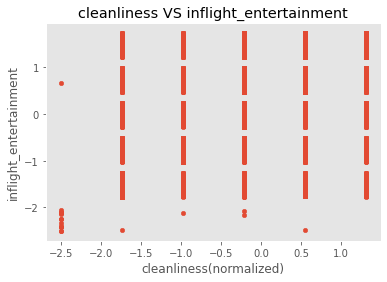

In [133]:
plt.style.use("ggplot")

X1 = airline_df[['inflight_entertainment','cleanliness']].values
scl.fit(X1)
X1_scl = scl.transform(X1)
plt.scatter(X1_scl[:, 1], X1_scl[:, 0]+np.random.random(X1_scl[:, 1].shape)/2, 
             s=20)
plt.xlabel('cleanliness(normalized)'), plt.ylabel('inflight_entertainment')
plt.grid()
plt.title('cleanliness VS inflight_entertainment')
plt.show()

From the graph, we can initialize the cluster numbers to 25

In [134]:
from sklearn.cluster import KMeans

X1 = airline_df[['inflight_entertainment','cleanliness']]

cls = KMeans(n_clusters=25, init='k-means++',random_state=5)
cls.fit(X1)
newfeature = cls.labels_ 

X = airline_df[['type_of_travel','customer_type','customer_class','onboard_service','online_boarding']]
X= pd.get_dummies(X, columns=['type_of_travel', 'customer_type','customer_class'])

X = np.column_stack((X,pd.get_dummies(newfeature)))
scl.fit(X)
X_scl = scl.transform(X)

acc = cross_val_score(clf,X_scl,y=y,cv=cv)

print ("Average accuracy (with kmeans for the first cluster)= ", acc.mean()*100, "+-", acc.std()*100)

Average accuracy (with kmeans for the first cluster)=  90.68400359071266 +- 0.2298282679942241


This clustering helped increase the accuracy on average, the deviation from the mean became a little bit higher.

Let's combine `onboard_service` and `online_boarding` as they both rated the customer boarding experience.

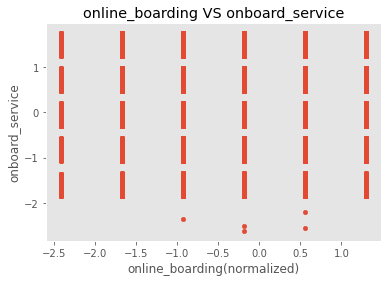

In [135]:
plt.style.use("ggplot")

X1 = airline_df[['onboard_service','online_boarding']].values
scl.fit(X1)
X1_scl = scl.transform(X1)
plt.scatter(X1_scl[:, 1], X1_scl[:, 0]+np.random.random(X1_scl[:, 1].shape)/2, s=20)
plt.xlabel('online_boarding(normalized)'), plt.ylabel('onboard_service')
plt.grid()
plt.title('online_boarding VS onboard_service')
plt.show()

From the graph, we can initialize the cluster numbers to 30

In [136]:
X2 = airline_df[['onboard_service','online_boarding']]

cls = KMeans(n_clusters=30, init='k-means++',random_state=5)
cls.fit(X2)
newfeature = cls.labels_ # the labels from kmeans clustering

X = airline_df[['type_of_travel','customer_type','customer_class',
                'cleanliness','inflight_entertainment']]
X= pd.get_dummies(X, columns=['type_of_travel', 'customer_type','customer_class'])

X = np.column_stack((X,pd.get_dummies(newfeature)))
scl.fit(X)
X_scl = scl.transform(X)

acc = cross_val_score(clf,X_scl,y=y,cv=cv)

print ("Average accuracy (with kmeans for the second cluster)= ", acc.mean()*100, "+-", acc.std()*100)

Average accuracy (with kmeans for the second cluster)=  90.6616077407165 +- 0.23100416456441447


This clustering didn't either help increase the accuracy on average or helped in the lowering of the deviation from the mean. 

Let's combine two different clusterings.

In [137]:
# get the first clustering
cls_1 = KMeans(n_clusters=25, init='k-means++',random_state=5)
cls_1.fit(X1)
newfeature_1 = cls_1.labels_ 

# append on the second clustering
cls_2 = KMeans(n_clusters=30, init='k-means++',random_state=5)
cls_2.fit(X2)
newfeature_2 = cls_2.labels_ 


X = airline_df[['type_of_travel', 'customer_type','customer_class']]
X= pd.get_dummies(X, columns=['type_of_travel', 'customer_type','customer_class'])

X = np.column_stack((X,pd.get_dummies(newfeature_1),pd.get_dummies(newfeature_2)))
scl.fit(X)
X_scl = scl.transform(X)

acc = cross_val_score(clf,X_scl,y=y,cv=cv)

print ("Average accuracy = ", acc.mean()*100, "+-", acc.std()*100)

Average accuracy =  88.28993907397414 +- 0.32496729198755575


After we combined two clusters, the accuracy decreased and the deviation increased, so it doesn't seem quite as accurate as before, let's tune `n_cluster` in both clusters.

In [106]:
%%time 
X1 = airline_df[['inflight_entertainment','cleanliness']]
X2 = airline_df[['onboard_service','online_boarding']]

params = []
for n_1 in range(24,28):
    for n_2 in range(28,34):
        # get the first clustering
        cls_1 = KMeans(n_clusters=n_1, init='k-means++',random_state=5)
        cls_1.fit(X1)
        newfeature_1 = cls_1.labels_ # the labels from kmeans clustering

        # append on the second clustering
        cls_2 = KMeans(n_clusters=n_2, init='k-means++',random_state=5)
        cls_2.fit(X2)
        newfeature_2 = cls_2.labels_ # the labels from kmeans clustering

        X = airline_df[['type_of_travel', 'customer_type','customer_class']]
        X= pd.get_dummies(X, columns=['type_of_travel', 'customer_type','customer_class'])
        X = np.column_stack((X,pd.get_dummies(newfeature_1),pd.get_dummies(newfeature_2)))
        scl.fit(X)
        X_scl = scl.transform(X)
        acc = cross_val_score(clf,X_scl,y=y,cv=cv)
        params.append((n_1,n_2,acc.mean()*100,acc.std()*100)) # save state

        print ("Clusters",n_1,n_2,"Average accuracy = ", acc.mean()*100, "+-", acc.std()*100)

Clusters 24 28 Average accuracy =  90.69404369171203 +- 0.220805895569201
Clusters 24 29 Average accuracy =  90.69558815288123 +- 0.2296242935958922
Clusters 24 30 Average accuracy =  90.66778630111195 +- 0.22767201813772858
Clusters 24 31 Average accuracy =  90.6693306429947 +- 0.2276443478657666
Clusters 24 32 Average accuracy =  90.6693306429947 +- 0.23343875457273625
Clusters 24 33 Average accuracy =  90.66624160136986 +- 0.2363911845309124
Clusters 25 28 Average accuracy =  90.69095453080077 +- 0.21850553854018828
Clusters 25 29 Average accuracy =  90.68940965212902 +- 0.23493516119668165
Clusters 25 30 Average accuracy =  90.67241968461953 +- 0.23436002509833048
Clusters 25 31 Average accuracy =  90.66933046406504 +- 0.22639068998532938
Clusters 25 32 Average accuracy =  90.665469162034 +- 0.23388298684766293
Clusters 25 33 Average accuracy =  90.66624154172665 +- 0.23023358337474403
Clusters 26 28 Average accuracy =  90.69172655263408 +- 0.22006254875783426
Clusters 26 29 Averag

It seems that the best we can do with these new discretization methods is around 90.67%. All the models are within one standard deviation of each other, so most clusterings in this range are pretty reasonable.

When first n_cluster = 24 and second n_cluster = 29, the model yields the best result. Let's use these values for comparison.

## 5.0 Modeling and Evaluation 2- Evaluate and Compare

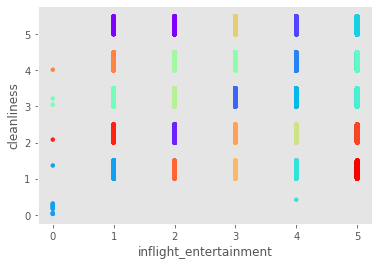

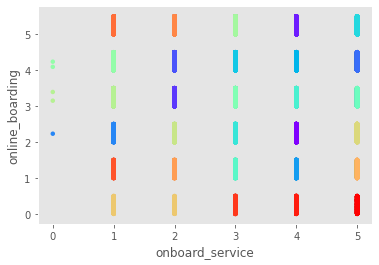

In [138]:
n_1=24
n_2=29

X1 = airline_df[['inflight_entertainment','cleanliness']]
X2 = airline_df[['onboard_service','online_boarding']]

cls_1 = KMeans(n_clusters=n_1, init='k-means++',random_state=5)
cls_1.fit(X1)
newfeature_1 = cls_1.labels_ 


cls_2 = KMeans(n_clusters=n_2, init='k-means++',random_state=5)
cls_2.fit(X2)
newfeature_2 = cls_2.labels_ 


X1=X1.values
plt.figure()
plt.scatter(X1[:, 0], X1[:, 1]+np.random.random(X1[:, 0].shape)/2, c=newfeature_1, cmap=plt.cm.rainbow, s=20, linewidths=0)
plt.xlabel('inflight_entertainment'), plt.ylabel('cleanliness')
plt.grid()

X2=X2.values
plt.figure()
plt.scatter(X2[:, 0], X2[:, 1]+np.random.random(X2[:, 1].shape)/2, c=newfeature_2, cmap=plt.cm.rainbow, s=20, linewidths=0)
plt.xlabel('onboard_service'), plt.ylabel('online_boarding')
plt.grid()


Since the second cluster didn't help increase the average accuracy. Let's see if we can make things simpler by only clustering the first set of attributes.

In [108]:
params = []
for n_1 in range(24,28):
    cls_1 = KMeans(n_clusters=n_1, init='k-means++',random_state=5)
    cls_1.fit(X1)
    newfeature_1 = cls_1.labels_ 
    X = airline_df[['type_of_travel','customer_type','customer_class','onboard_service','online_boarding']]
    X= pd.get_dummies(X, columns=['type_of_travel', 'customer_type','customer_class'])
    X = np.column_stack((X,pd.get_dummies(newfeature_1)))
    scl.fit(X)
    X_scl = scl.transform(X)
    acc = cross_val_score(clf,X_scl,y=y,cv=cv)
    params.append((n_1,n_2,n_3,acc.mean()*100,acc.std()*100))

    print ("Clusters",n_1,"Average accuracy = ", acc.mean()*100, "+-", acc.std()*100)

Clusters 24 Average accuracy =  90.68786531024627 +- 0.22672508852790238
Clusters 25 Average accuracy =  90.68091454908786 +- 0.22972160138291622
Clusters 26 Average accuracy =  90.68168686913725 +- 0.2314567366434929
Clusters 27 Average accuracy =  90.67936984934576 +- 0.23033428424046376


So it seems that the accuracy is fairly stagnant, and the standard deviation doesn't improve either. Now, let's also try to replace features using some slightly different clustering algorithms and see what works best for classification.

We will try Agglomerative Clustering and DBSCAN below. 

In [115]:
%%time 

from sklearn.cluster import AgglomerativeClustering

airline_df_down = airline_df.sample(n = 30000, random_state=5).copy()
y_down = airline_df_down['satisfaction'].copy()

X1 = airline_df_down[['inflight_entertainment','cleanliness']]

params = []
for link in ['ward', 'complete', 'average']:
    for n_1 in range(24,28):
        cls_1 = AgglomerativeClustering(n_clusters=n_1, linkage=link)
        cls_1.fit(X1)
        newfeature_1 = cls_1.labels_ 
        X = airline_df_down[['type_of_travel','customer_type','customer_class','onboard_service','online_boarding']]
        X= pd.get_dummies(X, columns=['type_of_travel', 'customer_type','customer_class'])
        X = np.column_stack((X,pd.get_dummies(newfeature_1)))
        scl.fit(X)
        X_scl = scl.transform(X)
        acc = cross_val_score(clf,X_scl,y=y_down,cv=cv)
        params.append((n_1,n_2,acc.mean()*100,acc.std()*100))

        print ("C=",n_1,link,"Average accuracy = ", acc.mean()*100, "+-", acc.std()*100)

C= 24 ward Average accuracy =  90.07333333333334 +- 0.5244679844057848
C= 25 ward Average accuracy =  90.05666666666669 +- 0.4982302011453466
C= 26 ward Average accuracy =  90.03999999999999 +- 0.5324576143798779
C= 27 ward Average accuracy =  90.05666666666666 +- 0.5446813543511249
C= 24 complete Average accuracy =  90.06666666666668 +- 0.5048652185374725
C= 25 complete Average accuracy =  90.04666666666668 +- 0.5350389393928883
C= 26 complete Average accuracy =  90.04333333333334 +- 0.5127377497317704
C= 27 complete Average accuracy =  90.07666666666667 +- 0.5088221693283412
C= 24 average Average accuracy =  90.06 +- 0.48917163540917613
C= 25 average Average accuracy =  90.05000000000001 +- 0.5540256712864885
C= 26 average Average accuracy =  90.07 +- 0.5152022256680701
C= 27 average Average accuracy =  90.04666666666668 +- 0.5153639490690037
Wall time: 4min 25s


Agglomerative Clustering didn't increase the average accuracy and decrease the deviation comparing to Kmeans clustering.

Let's take a look at DBSCAN.

In [113]:
%%time 

from sklearn.cluster import DBSCAN

params = []
for eps in [0.1, 0.125, 0.15]:
    for mpts in range(5,8):
        cls_1 = DBSCAN(eps=eps, min_samples=mpts)
        cls_1.fit(X1)
        newfeature_1 = cls_1.labels_ 

        X = airline_df[['type_of_travel','customer_type','customer_class','onboard_service','online_boarding']]
        X= pd.get_dummies(X, columns=['type_of_travel', 'customer_type','customer_class'])
        X = np.column_stack((X,pd.get_dummies(newfeature_1)))
        scl.fit(X)
        X_scl = scl.transform(X)
        acc = cross_val_score(clf,X_scl,y=y,cv=cv)
        params.append((n_1,n_2,acc.mean()*100,acc.std()*100))

        print (eps,mpts,"Average accuracy = ", acc.mean()*100, "+-", acc.std()*100)

0.1 5 Average accuracy =  90.68323144959291 +- 0.22891662128209253
0.1 6 Average accuracy =  90.68323144959291 +- 0.22891662128209253
0.1 7 Average accuracy =  90.68323144959291 +- 0.22891662128209253
0.125 5 Average accuracy =  90.68323144959291 +- 0.22891662128209253
0.125 6 Average accuracy =  90.68323144959291 +- 0.22891662128209253
0.125 7 Average accuracy =  90.68323144959291 +- 0.22891662128209253
0.15 5 Average accuracy =  90.68323144959291 +- 0.22891662128209253
0.15 6 Average accuracy =  90.68323144959291 +- 0.22891662128209253
0.15 7 Average accuracy =  90.68323144959291 +- 0.22891662128209253
Wall time: 26min 12s


## 6.0 Modeling and Evaluation 3- Visualize Results

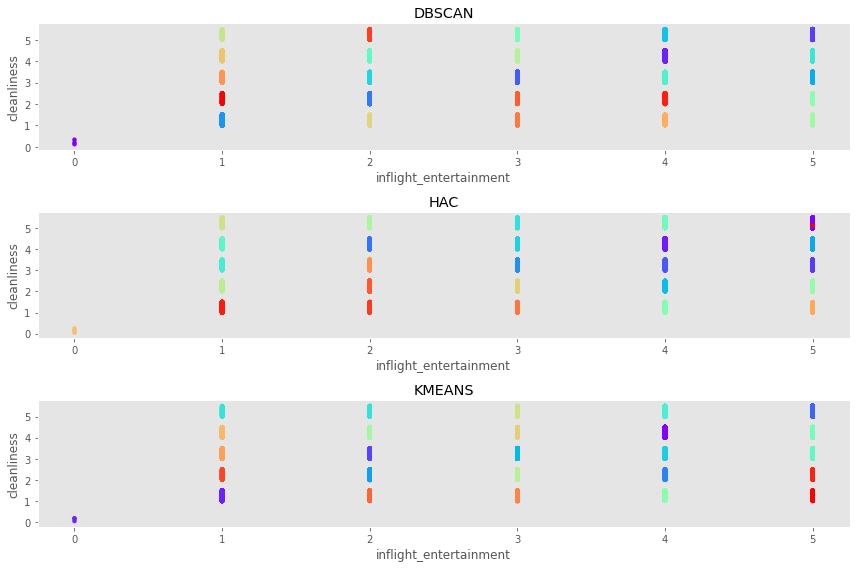

In [139]:
X1 = airline_df_down[['inflight_entertainment','cleanliness']]

cls = DBSCAN(eps=0.125, min_samples=6)
cls.fit(X1)
dbs_labels = cls.labels_ 

cls = AgglomerativeClustering(n_clusters=27, linkage='complete')
cls.fit(X1)
hac_labels = cls.labels_ 

cls = KMeans(n_clusters=24, random_state=5)
cls.fit(X1)
kmn_labels = cls.labels_

fig = plt.figure(figsize=(12,8))
title = ['DBSCAN','HAC','KMEANS']

for i,l in enumerate([dbs_labels,hac_labels,kmn_labels]):
    
    plt.subplot(3,1,i+1)
    plt.scatter(X1.iloc[:, 0], X1.iloc[:, 1]+np.random.random(X1.iloc[:, 1].shape)/2, c=l, cmap=plt.cm.rainbow, s=20, linewidths=0)
    plt.xlabel('inflight_entertainment'), plt.ylabel('cleanliness')
    plt.grid()
    plt.title(title[i])
    
plt.tight_layout()
plt.show()

## 7.0 Silhouette Analysis - Exceptional Work

In [111]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

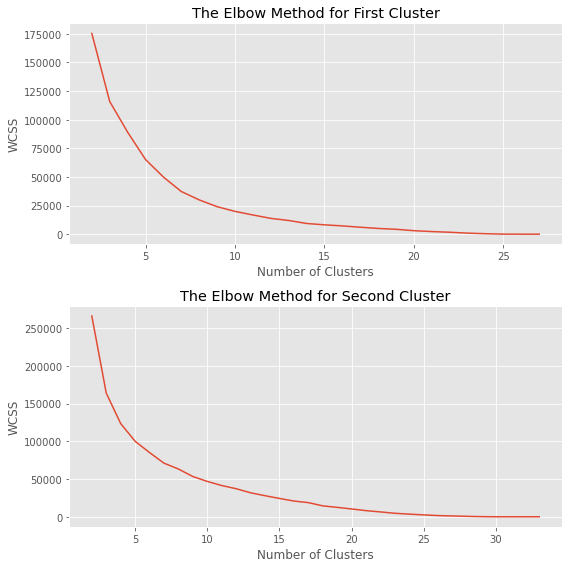

In [116]:
X1 = airline_df[['inflight_entertainment','cleanliness']]
X2 = airline_df[['onboard_service','online_boarding']]

wcss_1=[]
wcss_2=[]

for i in range(2,28):
    cls_1=KMeans(n_clusters=i, init='k-means++',random_state=5)
    cls_1.fit(X1)
    wcss_1.append(cls_1.inertia_)

for j in range(2,34):
    cls_2=KMeans(n_clusters=j, init='k-means++',random_state=5)
    cls_2.fit(X2)
    wcss_2.append(cls_2.inertia_)


f,ax=plt.subplots(figsize=(8,8))
plt.subplot(2,1,1)
plt.plot(range(2,28),wcss_1)
plt.title('The Elbow Method for First Cluster')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')

plt.subplot(2,1,2)
plt.plot(range(2,34),wcss_2)
plt.title('The Elbow Method for Second Cluster')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
f.tight_layout()
plt.show()

For n_clusters = 10 The average silhouette_score is : 0.7827952631797048
For n_clusters = 20 The average silhouette_score is : 0.9537565413412559
For n_clusters = 24 The average silhouette_score is : 0.9938677191010876
For n_clusters = 26 The average silhouette_score is : 1.0


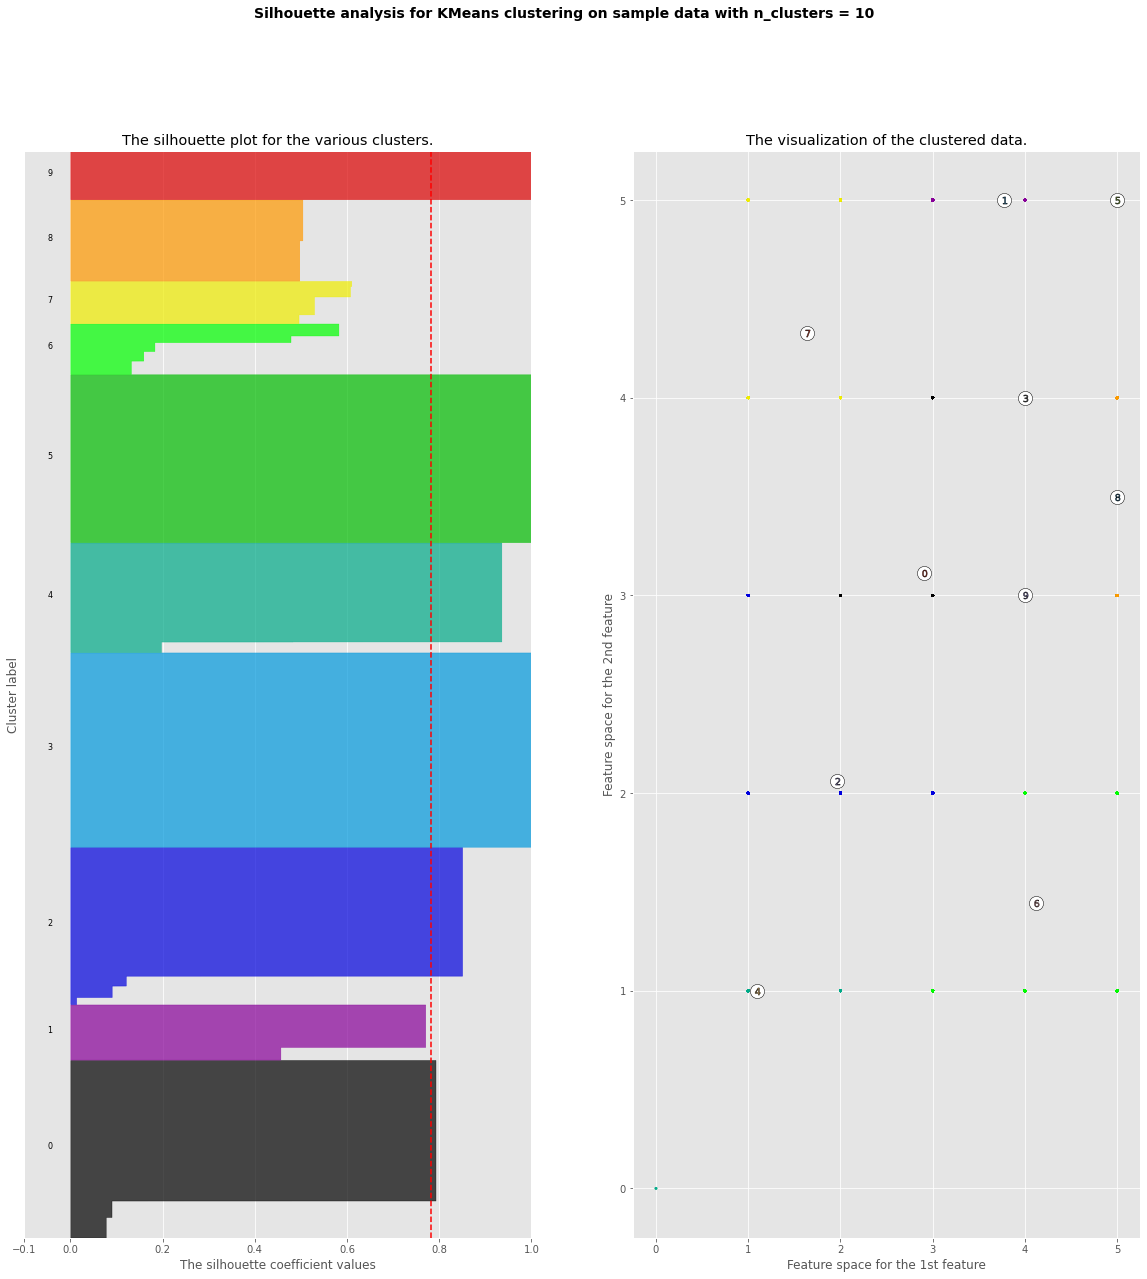

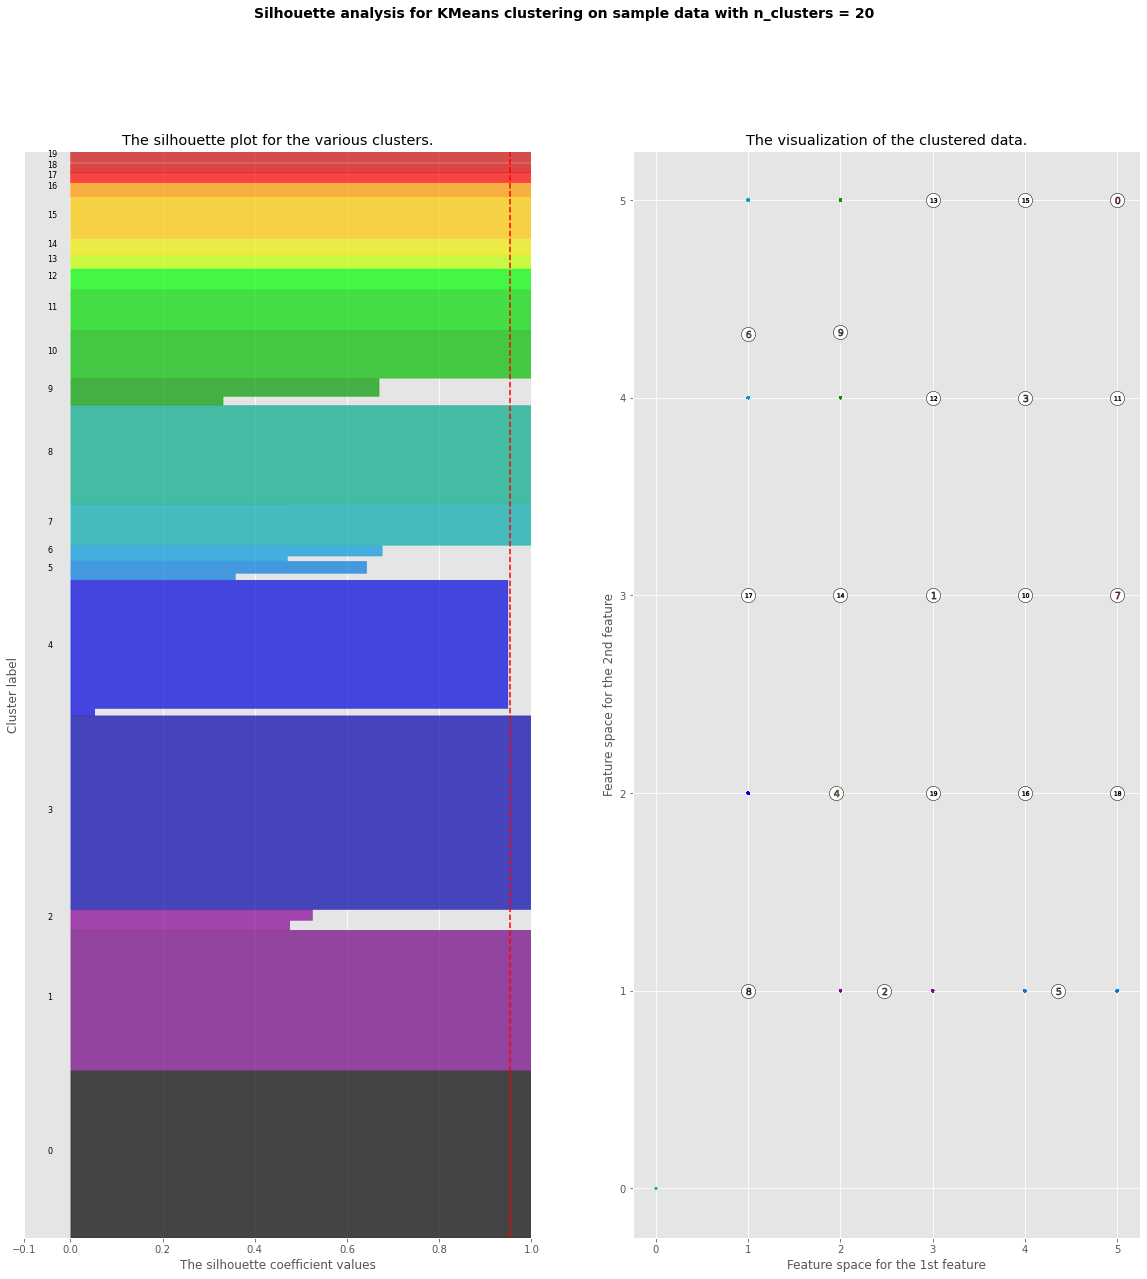

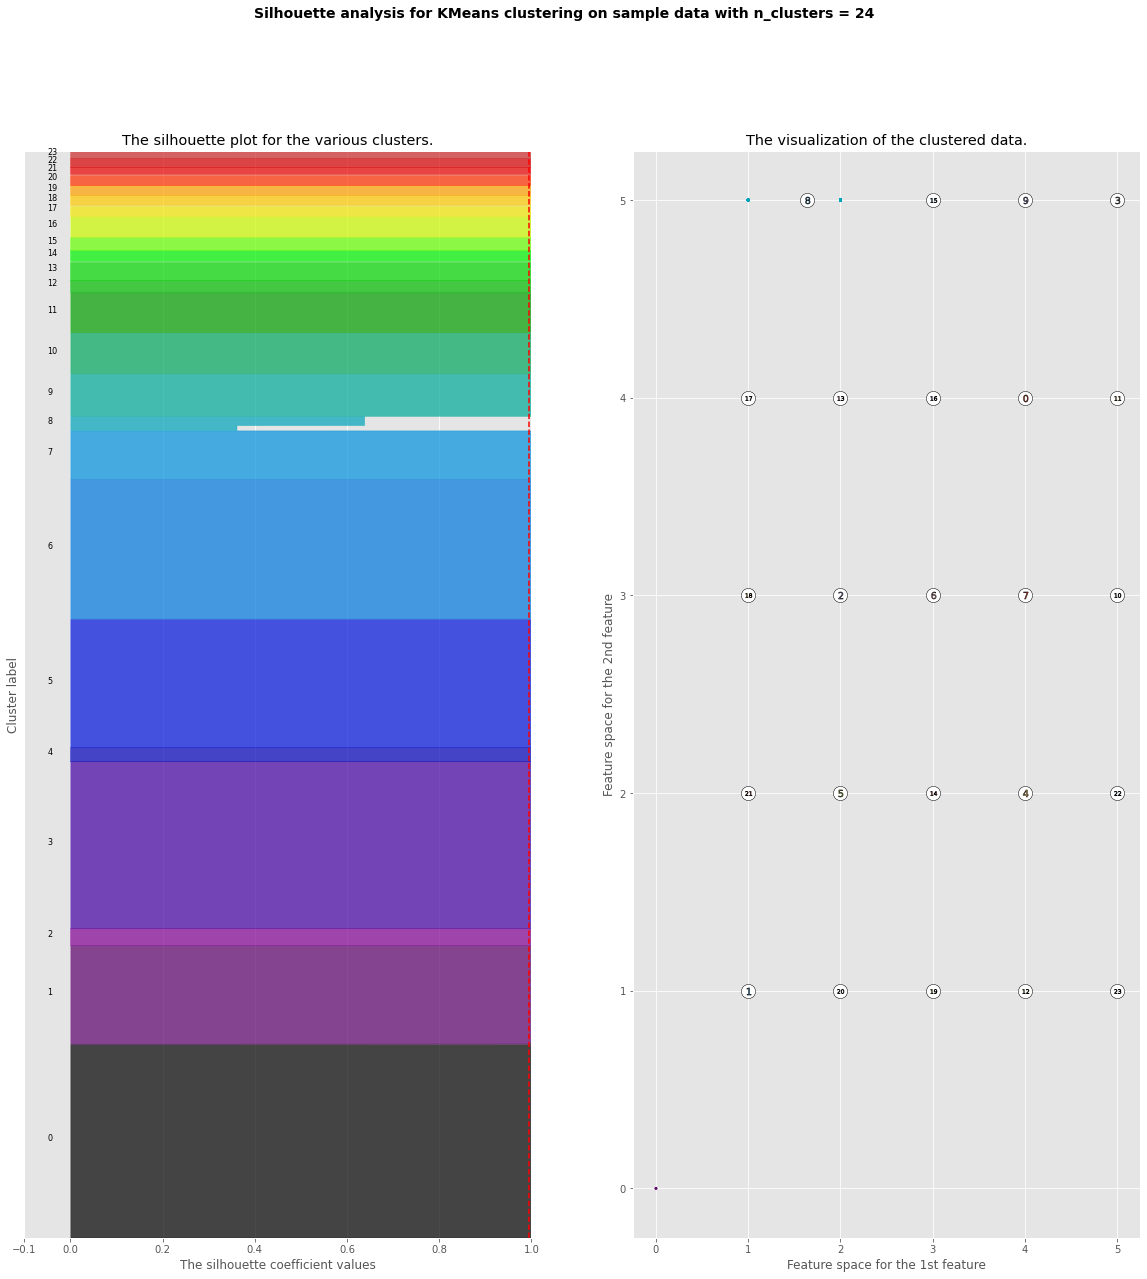

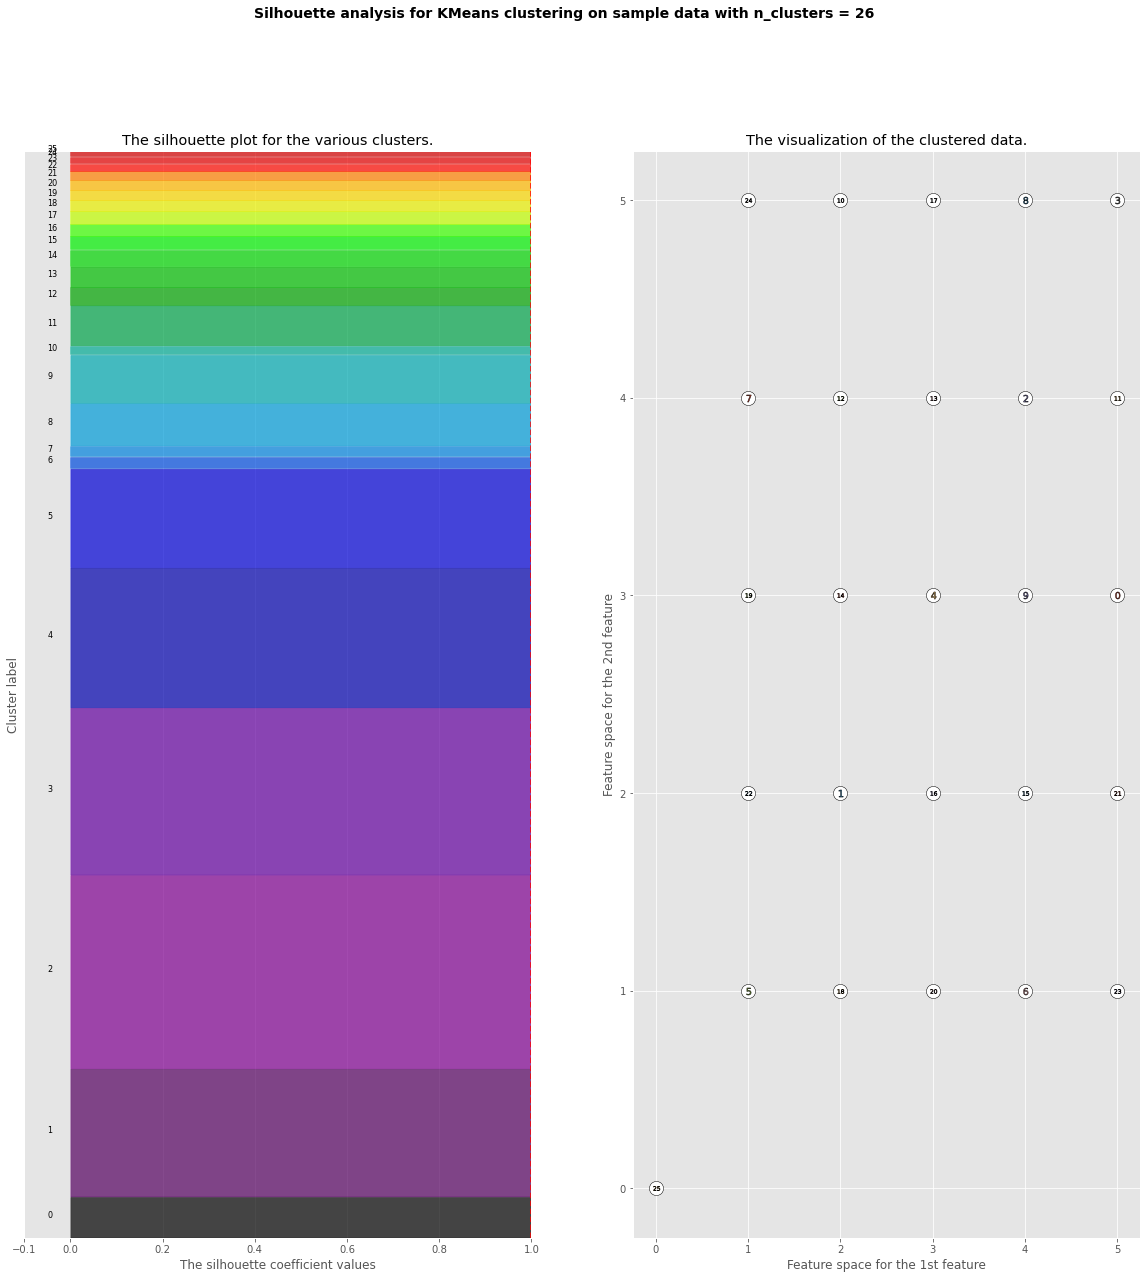

In [169]:
range_n_clusters_1 = [10,20,24,26]
for n_clusters in range_n_clusters_1:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(20,20)

    ax1.set_xlim([-0.1, 1])
    
    ax1.set_ylim([0, len(X1) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, random_state=5)
    cluster_labels = clusterer.fit_predict(X1)

    silhouette_avg = silhouette_score(X1, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    sample_silhouette_values = silhouette_samples(X1, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):

        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()
        
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i),fontsize=8)

        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([]) 
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X1.iloc[:, 0], X1.iloc[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

   
    centers = clusterer.cluster_centers_
  
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

All the silhouette coefficient values are positive. When cluster number =26, the average silhouette score is equal to 1 which means Kmeans algorithm clustered each point into the correct cluster.